# 1 Getting basic statistics over raw count files

Cynthia Soto <br>
Date: March 17th 2021<br>
Last md: March 19th 2021 <br>

**Assumptions:** <br>
You want to explore your data before perform functions over the data. <br>
Data are expression RNASeq raw counts.e.g: files generated with HTSeq tool <br>
**This is a custom script to get the general statistics over a subset of files with raw counts (Arabidopsis (Col-0) Healthy and Infected)** <br>

***Workflow:***<br>
1) Compouse a expression matrix<br>
2) Get some basic statics & the number of genes in zeros.<br>

In [277]:
import pandas as pd
import numpy as np
import os 
import glob

# Set some initial configuration 
pd.set_option("display.precision", 3)

In [278]:
try:
    # Change the current working Directory to the quantification dir
    #os.chdir("/home/cyntsc/Proyectos/athal1_htseq-counts/")
    os.chdir("/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/athal1_htseq-counts")
    print("Directory changed")
except OSError:
    print("Can't change the Current Working Directory")
s_path=os.getcwd()
print(s_path)

#athal3_htseq-counts/   infected
#athal1_htseq-counts/   healthy

Directory changed
/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/athal1_htseq-counts


In [279]:
#print(os.listdir(os.getcwd()) # list files in Dir
os.listdir(os.getcwd())

['SRR6283145',
 'Readme.md',
 'SRR6283144',
 'athal_gene_name.csv',
 'SRR3383640',
 'wgcna_dataset1_thaliana_sana',
 'SRR3383783',
 'trash',
 'SRR3383782',
 'SRR3383822',
 '.Rhistory',
 'SRR3383641',
 'SRR3383821']

In [280]:
for file in glob.glob("SRR*"):
    print(file)

SRR6283145
SRR6283144
SRR3383640
SRR3383783
SRR3383782
SRR3383822
SRR3383641
SRR3383821


### Adjust raw count files to get some stats
<ol>
<li>Remove lines that are not of interest</li>
<li>Get the basic stats about each sample</li>
<li>Get some additional stats: eg. number of zeros by sample</li>
</ol>

In [281]:
## Take each file and drop the last n rows (refering to the statistics of HTSeq) that are not counts.
## 1) Take in account that rows with statistic (last ones) produced by the quantification tool in each file will be removed to avoid error
## this need to be adjust depending the quantification tool.

## 2) It is assumed that files contains just "Genes and Counts"

for file in glob.glob("SRR*"):
    print(file)
    df= pd.read_csv(file, sep='\t', header=None)
    try:
        # Add column-names
        df.columns = ["Genes","Counts"]
        print(df.head(2))      
        df.drop(df.tail(5).index,inplace=True) # drop last n rows (refering statistics of HTSeq)
        #print(df.tail(5))       
        ## check genes in zeros across 
        genes_in_cero = df.isin([0]).sum()
        print("Genes in zeros:",genes_in_cero['Counts'])
        ## CREATE NEW file with basic statistics *_stats.csv
        df_stats=df.describe()
        #print(df_stats.columns)
        df_stats.loc['Zeros'] = [genes_in_cero['Counts']]      # adding a row
        df_stats.loc['sample'] = [file]                        # adding a row
        print(df_stats)            # print(df_stats.columns)
        df_stats.to_csv('../results-data/statistics/tmp/'+str(file)+'_raw_healthy_stats.csv', sep='\t')
    except:
        pass # doing nothing on exception, not processed because it is already pre-processed"

SRR6283145
       Genes  Counts
0  AT1G01010      76
1  AT1G01020     175
Genes in zeros: 7688
            Counts
count     2.77e+04
mean           633
std       2.95e+03
min              0
25%              0
50%             72
75%            481
max       1.41e+05
Zeros     7.69e+03
sample  SRR6283145
SRR6283144
       Genes  Counts
0  AT1G01010     181
1  AT1G01020     163
Genes in zeros: 7700
            Counts
count     2.77e+04
mean           707
std       4.07e+03
min              0
25%              0
50%             63
75%            469
max       2.75e+05
Zeros      7.7e+03
sample  SRR6283144
SRR3383640
       Genes  Counts
0  AT1G01010      91
1  AT1G01020     108
Genes in zeros: 7396
            Counts
count     2.77e+04
mean           348
std       1.86e+03
min              0
25%              0
50%             52
75%            281
max       1.53e+05
Zeros      7.4e+03
sample  SRR3383640
SRR3383783
       Genes  Counts
0  AT1G01010      57
1  AT1G01020     117
Genes in zeros

### Here all statistic files (previously generated) will be integrated in one file to plot it later

In [282]:
# if you want to check the files to be processed before to run the code
for file in glob.glob("../results-data/statistics/tmp/*_raw_healthy_stats.csv"):
    print(file)

../results-data/statistics/tmp/SRR3383821_raw_healthy_stats.csv
../results-data/statistics/tmp/SRR3383783_raw_healthy_stats.csv
../results-data/statistics/tmp/SRR3383822_raw_healthy_stats.csv
../results-data/statistics/tmp/SRR3383640_raw_healthy_stats.csv
../results-data/statistics/tmp/SRR3383641_raw_healthy_stats.csv
../results-data/statistics/tmp/SRR6283145_raw_healthy_stats.csv
../results-data/statistics/tmp/SRR3383782_raw_healthy_stats.csv
../results-data/statistics/tmp/SRR6283144_raw_healthy_stats.csv


In [283]:
bfirst_file=True
for file in glob.glob("../results-data/statistics/tmp/*_raw_healthy_stats.csv"):
    print(file)
    df_tmp=pd.read_csv(file, sep='\t', header=None, index_col=False)
    #print(df_tmp)
    # transpose df
    df = df_tmp.T
    # drop index 0 (somelike headers) -- rows
    df.drop(df.index[:1], inplace=True)
    if bfirst_file==True:
        df_all=df
        bfirst_file=False
        #print(df_all)
    else:
        df_all=df_all.append(df)
        #print(df_all)
        pass
    
#print(df_all)

../results-data/statistics/tmp/SRR3383821_raw_healthy_stats.csv
../results-data/statistics/tmp/SRR3383783_raw_healthy_stats.csv
../results-data/statistics/tmp/SRR3383822_raw_healthy_stats.csv
../results-data/statistics/tmp/SRR3383640_raw_healthy_stats.csv
../results-data/statistics/tmp/SRR3383641_raw_healthy_stats.csv
../results-data/statistics/tmp/SRR6283145_raw_healthy_stats.csv
../results-data/statistics/tmp/SRR3383782_raw_healthy_stats.csv
../results-data/statistics/tmp/SRR6283144_raw_healthy_stats.csv


In [284]:
#df_all
# set column's names to apply filters by name
df_all.columns = ['Metric','count','mean','std','min','25%','50%','75%','max','Zeros','sample']
df_all
#df_all.set_index('sample', inplace=True)
df_all.reset_index()
print(df_all.index)
df_all.head(5)

Int64Index([1, 1, 1, 1, 1, 1, 1, 1], dtype='int64')


,Metric,count,mean,std,min,25%,50%,75%,max,Zeros,sample
1,Counts,27655.0,481.7541493400832,2645.055346295502,0.0,0.0,61.0,351.0,148426.0,7360.0,SRR3383821
1,Counts,27655.0,452.5218224552522,3224.049552321334,0.0,0.0,51.0,303.0,315702.0,7627.0,SRR3383783
1,Counts,27655.0,319.34670041583803,2041.0240612378823,0.0,0.0,40.0,224.0,113771.0,7702.0,SRR3383822
1,Counts,27655.0,347.664328331224,1860.4692499293658,0.0,0.0,52.0,281.0,153437.0,7396.0,SRR3383640
1,Counts,27655.0,716.3532815042488,3764.29342521545,0.0,0.0,105.0,586.0,315017.0,7039.0,SRR3383641


In [285]:
# select and format the measures to be plotted
df_all[['mean','std','25%','50%','75%','max','Zeros']] = df_all[['mean','std','25%','50%','75%','max','Zeros']].apply(pd.to_numeric)
# apply decimals 
df_all = df_all.filter(['sample','mean','std','25%','50%','75%','max','Zeros']).round(decimals=3)
#print(df_plot.dtypes)
print(df_all.index)

Int64Index([1, 1, 1, 1, 1, 1, 1, 1], dtype='int64')


In [286]:
df_plot = df_all
#print(df_plot.index)
df_plot.head(5)

,sample,mean,std,25%,50%,75%,max,Zeros
1,SRR3383821,481.754,2645.055,0.0,61.0,351.0,148426.0,7360.0
1,SRR3383783,452.522,3224.050,0.0,51.0,303.0,315702.0,7627.0
1,SRR3383822,319.347,2041.024,0.0,40.0,224.0,113771.0,7702.0
1,SRR3383640,347.664,1860.469,0.0,52.0,281.0,153437.0,7396.0
1,SRR3383641,716.353,3764.293,0.0,105.0,586.0,315017.0,7039.0



###  Adding labels for plotting (leyends)


In [287]:
file='../meta-data/ID_samples.csv'
df_meta=pd.read_csv(file, sep='\,', engine='python', usecols=[0,1]) 
print(df_meta.index)
df_meta.head(5)

RangeIndex(start=0, stop=25, step=1)


,sample,ID
0,SRR3383696,Bc12
1,SRR3383697,Bc12.1
2,SRR3383780,Bc18
3,SRR3383779,Bc18.1
4,SRR10586397,Bc24


In [288]:
#df_meta.reset_index()
df_meta.set_index("sample", inplace=True)
df_meta.reset_index()

,sample,ID
0,SRR3383696,Bc12
1,SRR3383697,Bc12.1
2,SRR3383780,Bc18
3,SRR3383779,Bc18.1
4,SRR10586397,Bc24
5,SRR10586399,Bc24.1
6,SRR364390,Ch22
7,SRR364389,Ch22.1
8,SRR364391,Ch22.2
9,SRR364392,Ch22.3


### Merge the df(s) to plot some stats about it with the sample names acurrate labeled

In [289]:
#merged_df = pd.merge(df_plot, df_meta, on="sample")
merged_df = pd.merge(df_plot, df_meta, left_on='sample', right_on='sample')

In [290]:
merged_df
merged_df.to_csv('../results-data/statistics/all_raw_healthy_stats_zeros.csv', sep='\t', header=True, index=None)

### Get and sort specific column of interest 

In [291]:
## Ex: zeros field 
df_tmp= merged_df.sort_values('ID')
#df_tmp
col_ceros = df_tmp['Zeros'].tolist()
col_ceros.sort(reverse=False)
print(col_ceros)
#newlst

[6888.0, 7039.0, 7360.0, 7396.0, 7627.0, 7688.0, 7700.0, 7702.0]


### Plot some metrics of interest 

In [292]:
import matplotlib.pyplot as plt
## if you wish to consult available styles
#plt.style.available[:30]    
# 'Solarize_Light2','_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale',  'seaborn'

In [293]:
plt.style.use('seaborn-white')    # classic
# kind : str

#         ‘line’ : line plot (default)
#         ‘bar’ : vertical bar plot
#         ‘barh’ : horizontal bar plot
#         ‘hist’ : histogram
#         ‘box’ : boxplot
#         ‘kde’ : Kernel Density Estimation plot
#         ‘density’ : same as ‘kde’
#         ‘area’ : area plot
#         ‘pie’ : pie plot
#         ‘scatter’ : scatter plot
#         ‘hexbin’ : hexbin plot

<AxesSubplot:>

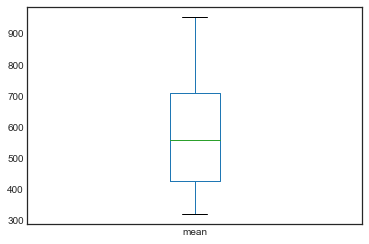

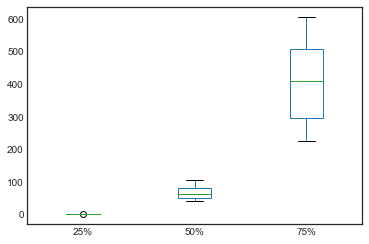

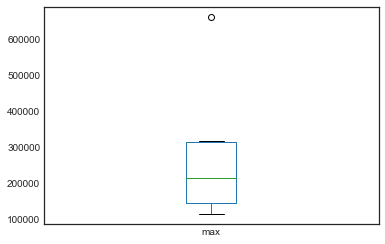

In [294]:
#merged_df.plot(x='ID', y=['mean','std'], kind='box') 
merged_df.plot(x='ID', y=['mean'], kind='box') 
merged_df.plot(x='ID', y=['25%','50%','75%'], kind='box') 
merged_df.plot(x='ID', y=['max'], kind='box') 

/home/cyntsc/Proyectos/tesis-code/jn_tesis_env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


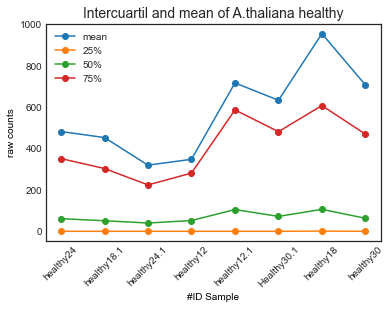

<Figure size 432x288 with 0 Axes>

In [295]:
## be careful to assure your metrics can be plotted in the same dimensions
## Ex: zero field is out of range respecting the other measures
merged_df.plot(x='ID', y=['mean','25%','50%','75%'], kind='line',marker='o')   #marker='o'
plt.xlabel('#ID Sample',color='black')
plt.xticks(rotation=45)
plt.ylabel('raw counts',color='black')
plt.title('Intercuartil and mean of A.thaliana healthy', fontsize=14)
plt.legend(loc=0)
plt.show()
plt.savefig("../results-data/statistics/athal_healthy_raw_stats.png")

### Plot the number of genes with zero count by sample

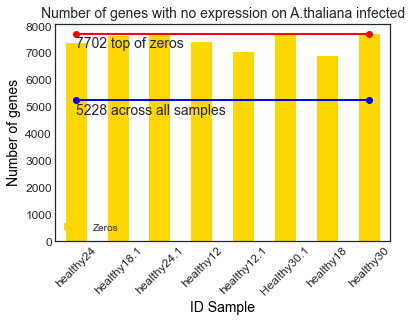

In [296]:
# More plots
merged_df.plot(x='ID', y='Zeros', kind='bar', color='gold',fontsize=12)
plt.xlabel('ID Sample',color='black',fontsize=14)
plt.xticks(rotation=45)
plt.ylabel('Number of genes',color='black',fontsize=14)
plt.title('Number of genes with no expression on A.thaliana infected', fontsize=14)
#plt.legend(loc=1)

## add arbitrary lines to canvas
plt.plot([0, 7], [7702, 7702], 'k-', lw=2, color='red',marker = 'o')
plt.plot([0, 7], [5228, 5228], 'k-', lw=2, color='blue',marker = 'o')
plt.text(0, 7200, "7702 top of zeros", fontsize=14)
plt.text(0, 4700, "5228 across all samples", fontsize=14)

plt.show()
#plt.savefig("all_infected_num_zeros.png")